# Exercício 5

Guilherme Lisboa de Oliveira - GRR20170414

```{admonition} Exercício

Utilize os dados Wall-Following Robot Navigation github.com/andersonara/datasets. Compare os métodos de Regressão Logística Regularizada, KNN, Árvores de decisão e redes neurais. Exiba as fronteiras de decisão para todos os métodos aplicados. Interprete os resultados.

```

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.random.seed(20170414)

%matplotlib inline

Importando os dados, temos:

In [3]:
from pandas import read_csv

dados_url = "https://raw.githubusercontent.com/andersonara/datasets/master/wall-robot-navigation.csv"
dados = read_csv(dados_url, sep=';')

Separando os dados entre treinamento e teste, temos:

In [4]:
from sklearn.model_selection import train_test_split

X, y = dados[['X1', 'X2']], dados[['Y']]
tamanho_fração_de_teste = 0.2

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=tamanho_fração_de_teste)

Para auxiliar na visualização das fronteiras de decisão, temos a seguinte função:

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

def fronteiras_de_decisão(classificador, título: str) ->  DecisionBoundaryDisplay:
    imagem =  DecisionBoundaryDisplay.from_estimator(classificador,
                                                    x_teste,
                                                    xlabel='X1',
                                                    ylabel='X2',
                                                    grid_resolution=1000)

    imagem.ax_.scatter(x_teste['X1'], x_teste['X2'], c=y_teste.values, edgecolors='k')
    imagem.ax_.set_title(título)
    imagem.figure_.set_size_inches(16, 8)

    return imagem

## Regressão Logística Regularizada

Regressão logística ajustada com regularização L2 (padrão do SciKit Learn) obteve medidas de precisão acima de 0,91, mostrando queda de sensibilidade nas classes com menos observações no conjunto de testes. As margens de decisão formam retas.

              precision    recall  f1-score   support

           1       0.91      0.91      0.91       446
           2       0.91      0.99      0.95       423
           3       0.94      0.82      0.87        55
           4       0.99      0.79      0.88       168

    accuracy                           0.92      1092
   macro avg       0.94      0.88      0.90      1092
weighted avg       0.92      0.92      0.92      1092



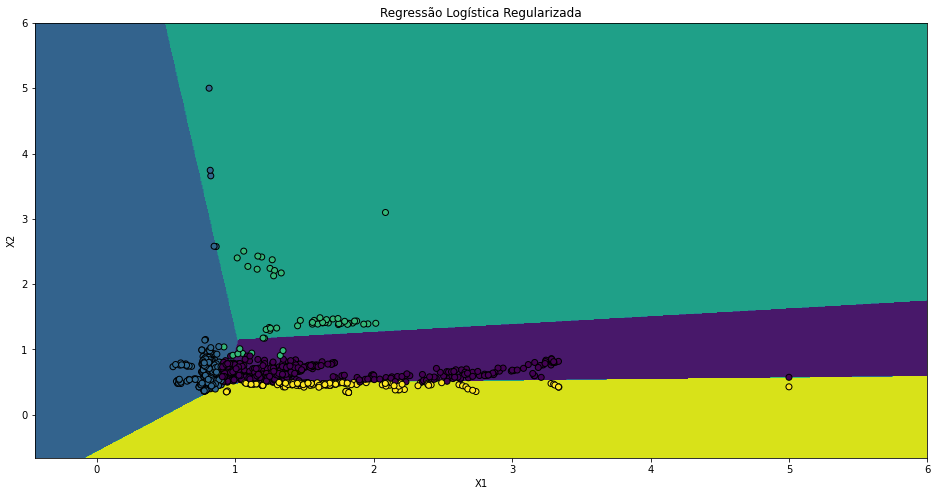

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

ajuste_reg_logística = LogisticRegression().fit(x_treinamento, y_treinamento)
print(classification_report(y_teste, ajuste_reg_logística.predict(x_teste)))

fronteiras_de_decisão(ajuste_reg_logística, 'Regressão Logística Regularizada');

## KNN

O KNN mostrou-se mais eficiente na classificação dos dados de teste, porém com margens mais flexíveis que criam regiões indicativas de superajuste quando coparado a regressão logística regularizada.

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       446
           2       0.99      0.99      0.99       423
           3       0.92      0.98      0.95        55
           4       0.99      0.97      0.98       168

    accuracy                           0.98      1092
   macro avg       0.97      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



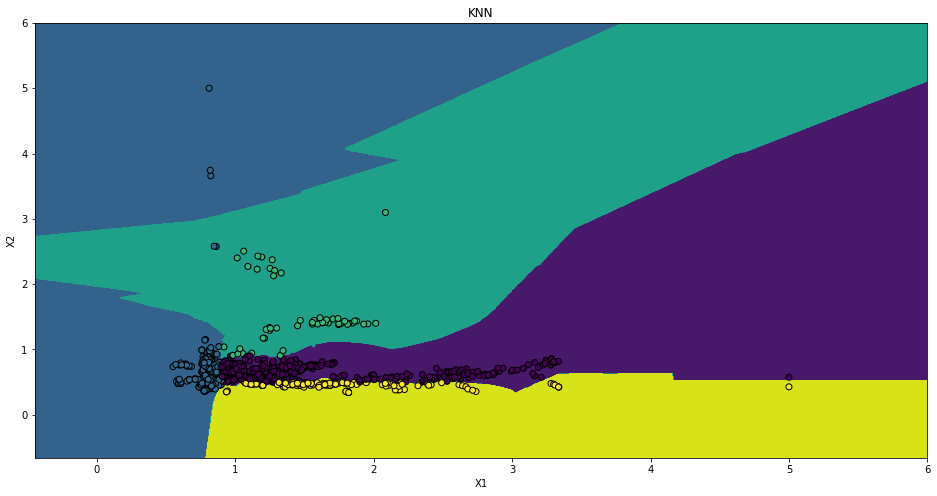

In [7]:
from sklearn.neighbors import KNeighborsClassifier

ajuste_knn = KNeighborsClassifier().fit(x_treinamento, y_treinamento)
print(classification_report(y_teste, ajuste_knn.predict(x_teste)))

fronteiras_de_decisão(ajuste_knn, 'KNN');

## Árvore de Decisão

Árvore de decisão classificou todos os pontos de maneira correta, cabendo uma análise mais profunda para identificar se trata-se deu um conjunto bem ajustado para o algoritmo de árvores ou se trata-se de um caso de sobreajuste. As margens de classificação são paralelas ou perpendiculares aos eixos X1 e X2.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00       423
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00       168

    accuracy                           1.00      1092
   macro avg       1.00      1.00      1.00      1092
weighted avg       1.00      1.00      1.00      1092



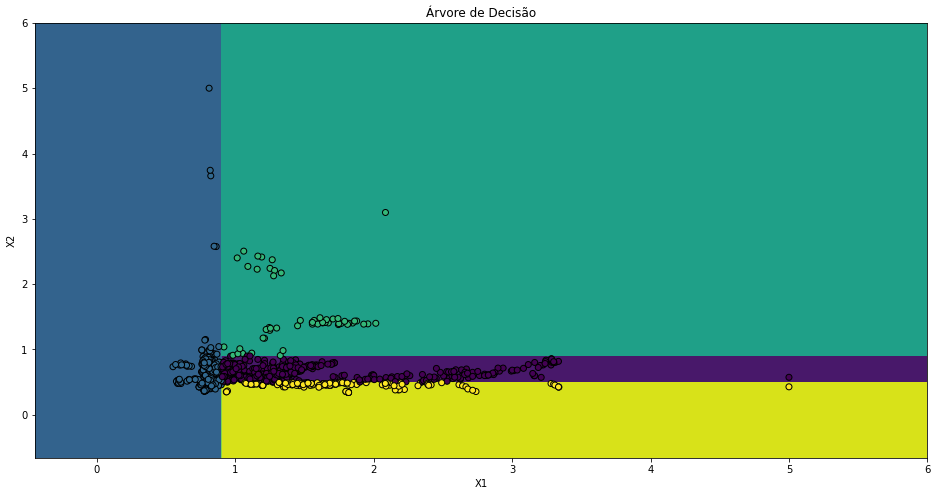

In [8]:
from sklearn.tree import DecisionTreeClassifier

ajuste_árvore_decisão = DecisionTreeClassifier().fit(x_treinamento, y_treinamento)
print(classification_report(y_teste, ajuste_árvore_decisão.predict(x_teste)))

fronteiras_de_decisão(ajuste_árvore_decisão, 'Árvore de Decisão');

## Rede Neural

Rede neural obteve bons resultados, não apresentando queda de sensibilidade nas observações menos frequêntes como a regressão logística ou margens excessivamente flexíveis como no KNN. As margens de classificação dependendem da função de ativação escolhida, neste exemplo, a aparência curvada é dada pela função de ativação sigmóide.

              precision    recall  f1-score   support

           1       0.98      0.92      0.95       446
           2       0.94      1.00      0.97       423
           3       0.96      0.89      0.92        55
           4       0.95      0.97      0.96       168

    accuracy                           0.96      1092
   macro avg       0.96      0.95      0.95      1092
weighted avg       0.96      0.96      0.96      1092



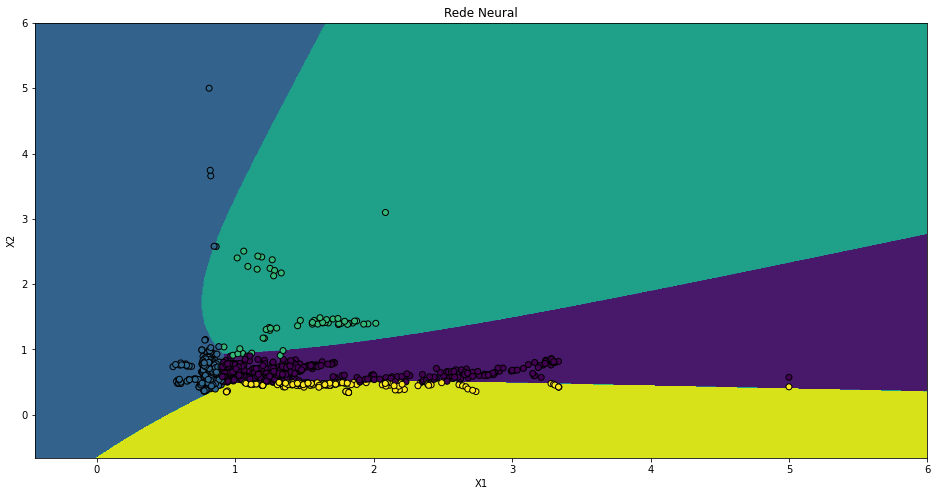

In [9]:
from sklearn.neural_network import MLPClassifier

rede_neural = MLPClassifier(activation='logistic').fit(x_treinamento, y_treinamento)
print(classification_report(y_teste, rede_neural.predict(x_teste)))

fronteiras_de_decisão(rede_neural, 'Rede Neural');